In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from tensorflow import keras
from sklearn.metrics import matthews_corrcoef, accuracy_score, root_mean_squared_error, mean_squared_error, mean_absolute_error, precision_score, confusion_matrix, multilabel_confusion_matrix, classification_report, f1_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import gc
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

2025-04-05 20:29:43.093504: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1743874183.112953  340631 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1743874183.118843  340631 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1743874183.134298  340631 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1743874183.134315  340631 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1743874183.134317  340631 computation_placer.cc:177] computation placer alr

# Functions

In [2]:
def visualize_CM(matrix):
    """
    Visualize Correlation Matrix
    """
    sns.heatmap(matrix,annot=True)

# Load data

In [3]:
data = pd.read_csv('data/CIC_IoT2023/binary_classification_data.csv')

In [4]:
data = data.drop(['Unnamed: 0', 'label', 'Attack Type'], axis=1)

In [5]:
data.head()

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,Class
0,0.042561,3077.94,16.89,64.00,36400.751310,36400.751310,0.0,0.0,0.0,0.0,...,1.921533,50.62,8.301635e+07,9.5,10.053453,2.722150,31.271048,0.12,141.55,Attack
1,0.029488,13121.00,16.83,63.36,11326.661293,11326.661293,0.0,0.0,0.0,0.0,...,0.342997,50.10,8.310644e+07,9.5,10.010033,0.485827,0.922878,0.13,141.55,Attack
2,0.000093,55.10,6.11,64.58,172.441464,172.441464,0.0,0.0,0.0,0.0,...,2.144515,54.36,8.307625e+07,9.5,10.479273,3.035528,25.971035,0.19,141.55,Attack
3,0.000000,54.00,6.00,64.00,2.737399,2.737399,0.0,0.0,0.0,0.0,...,0.000000,54.00,8.306398e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,Attack
4,0.000000,54.00,6.00,64.00,17.651940,17.651940,0.0,0.0,0.0,0.0,...,0.000000,54.00,8.303405e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,Attack


In [6]:
data.tail()

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,Class
599995,32.820355,35497.2,9.3,120.5,9.369932,9.369932,0.0,0.0,0.0,0.0,...,86.704499,137.5,1.665198e+08,13.5,14.582491,121.236679,7367.590182,1.0,244.6,Benign
599996,71.611939,110533.2,7.0,65.9,17.676581,17.676581,0.0,0.0,0.0,0.0,...,203.070312,226.2,1.456461e-02,5.5,17.712195,287.184789,84417.097432,0.9,38.5,Benign
599997,19.192783,1900653.7,6.0,214.8,104.295310,104.295310,0.0,0.0,0.0,0.0,...,405.348792,66.0,1.665228e+08,13.5,19.536899,574.466102,166158.498723,1.0,244.6,Benign
599998,58.231502,1773541.9,12.6,133.5,25.655042,25.655042,0.0,0.0,0.0,0.0,...,463.349243,216.4,9.113193e-03,5.5,25.324125,655.274783,245165.553312,0.9,38.5,Benign
599999,15.780854,889539.8,6.0,94.2,83.747435,83.747435,0.0,0.0,0.0,0.0,...,337.504993,799.0,5.663800e-03,5.5,23.064161,477.304139,220375.090153,0.7,38.5,Benign


In [7]:
attacks = data.loc[data['Class'] == 'Attack']
benign = data.loc[data['Class'] == 'Benign']

In [8]:
attacks

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,Class
0,0.042561,3077.94,16.89,64.00,36400.751310,36400.751310,0.0,0.0,0.0,0.0,...,1.921533,50.62,8.301635e+07,9.5,10.053453,2.722150,31.271048,0.12,141.55,Attack
1,0.029488,13121.00,16.83,63.36,11326.661293,11326.661293,0.0,0.0,0.0,0.0,...,0.342997,50.10,8.310644e+07,9.5,10.010033,0.485827,0.922878,0.13,141.55,Attack
2,0.000093,55.10,6.11,64.58,172.441464,172.441464,0.0,0.0,0.0,0.0,...,2.144515,54.36,8.307625e+07,9.5,10.479273,3.035528,25.971035,0.19,141.55,Attack
3,0.000000,54.00,6.00,64.00,2.737399,2.737399,0.0,0.0,0.0,0.0,...,0.000000,54.00,8.306398e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,Attack
4,0.000000,54.00,6.00,64.00,17.651940,17.651940,0.0,0.0,0.0,0.0,...,0.000000,54.00,8.303405e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,Attack
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,0.000553,54.58,6.00,64.00,17.516119,17.516119,0.0,0.0,1.0,0.0,...,0.000000,54.00,8.309414e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,Attack
299996,0.000000,54.00,6.00,64.00,23.596050,23.596050,0.0,0.0,0.0,0.0,...,0.000000,54.00,8.294670e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,Attack
299997,0.000000,54.00,6.00,64.00,20.263154,20.263154,0.0,0.0,0.0,0.0,...,0.000000,54.00,8.306724e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,Attack
299998,0.000000,54.00,6.00,64.00,3.707481,3.707481,0.0,0.0,1.0,0.0,...,0.000000,54.00,8.298166e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,Attack


In [9]:
benign

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,Class
300000,25.634449,2041382.5,6.0,148.0,55.096694,55.096694,0.0,0.0,0.0,0.0,...,406.594882,780.0,4.037595e-03,5.5,47.967062,575.011996,2.770045e+05,0.6,38.5,Benign
300001,93.393063,194516.9,6.0,80.1,10.044719,10.044719,0.0,0.0,0.0,0.0,...,529.802207,922.2,4.718494e-03,5.5,36.402911,749.253467,3.514827e+05,0.8,38.5,Benign
300002,2.007331,511219.2,6.0,80.7,209.480134,209.480134,0.0,0.0,0.0,0.0,...,2022.080470,2238.0,1.665180e+08,13.5,60.835527,2866.118578,4.132241e+06,1.0,244.6,Benign
300003,0.165718,2127.6,6.5,57.6,10571.153493,10571.153493,0.0,0.0,0.0,0.0,...,135.519041,216.0,1.665179e+08,13.5,16.402380,161.196077,1.304389e+04,1.0,244.6,Benign
300004,94.440591,6271338.7,6.0,80.8,59.849069,59.849069,0.0,0.0,0.0,0.0,...,313.867567,1224.4,2.953982e-03,5.5,52.431584,443.875770,1.655302e+05,0.6,38.5,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599995,32.820355,35497.2,9.3,120.5,9.369932,9.369932,0.0,0.0,0.0,0.0,...,86.704499,137.5,1.665198e+08,13.5,14.582491,121.236679,7.367590e+03,1.0,244.6,Benign
599996,71.611939,110533.2,7.0,65.9,17.676581,17.676581,0.0,0.0,0.0,0.0,...,203.070312,226.2,1.456461e-02,5.5,17.712195,287.184789,8.441710e+04,0.9,38.5,Benign
599997,19.192783,1900653.7,6.0,214.8,104.295310,104.295310,0.0,0.0,0.0,0.0,...,405.348792,66.0,1.665228e+08,13.5,19.536899,574.466102,1.661585e+05,1.0,244.6,Benign
599998,58.231502,1773541.9,12.6,133.5,25.655042,25.655042,0.0,0.0,0.0,0.0,...,463.349243,216.4,9.113193e-03,5.5,25.324125,655.274783,2.451656e+05,0.9,38.5,Benign


In [10]:
attacks_upd = attacks.sample(n = 30000)
benign_upd = benign.sample(n = 30000)
data_upd = pd.concat([attacks_upd, benign_upd])

In [11]:
data_upd

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,Class
264324,0.000000,53.46,5.94,63.36,23.575757,23.575757,0.0,0.0,1.0,0.0,...,0.040218,54.06,8.309322e+07,9.5,10.393232,0.057331,5.478917e-02,0.03,141.55,Attack
217179,0.016251,54.54,6.00,65.91,0.965072,0.965072,0.0,0.0,0.0,0.0,...,0.000000,54.00,8.333181e+07,9.5,10.392305,0.000000,0.000000e+00,0.00,141.55,Attack
165202,0.000000,0.00,1.00,64.00,0.502877,0.502877,0.0,0.0,0.0,0.0,...,0.000000,42.00,8.312876e+07,9.5,9.165151,0.000000,0.000000e+00,0.00,141.55,Attack
32909,0.147192,21096.90,17.00,63.87,4293.479829,4293.479829,0.0,0.0,0.0,0.0,...,0.993991,50.40,8.301584e+07,9.5,10.026493,1.408743,9.995798e+00,0.10,141.55,Attack
42445,0.060388,91.80,6.00,64.00,23.348623,23.348623,0.0,0.0,1.0,0.0,...,0.000000,54.00,8.336106e+07,9.5,10.392305,0.000000,0.000000e+00,0.00,141.55,Attack
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310022,45.276276,2667278.00,7.10,64.00,61.622946,61.622946,0.0,0.0,0.0,0.0,...,520.205714,1376.20,1.665250e+08,13.5,26.209662,735.962038,3.471133e+05,1.00,244.60,Benign
385922,31.686568,1892621.70,6.00,214.80,64.278574,64.278574,0.0,0.0,0.0,0.0,...,0.000000,66.00,2.317286e-03,5.5,11.489125,0.000000,0.000000e+00,0.00,38.50,Benign
428095,35.597200,571271.40,10.40,190.30,16.445885,16.445885,0.0,0.0,0.0,0.0,...,489.717209,334.40,1.097200e-02,5.5,31.812115,692.564719,2.713644e+05,0.90,38.50,Benign
594136,70.157971,2133628.50,7.70,95.50,30.760484,30.760484,0.0,0.0,0.0,0.0,...,1043.924319,2165.30,1.665202e+08,13.5,28.519499,1483.015631,2.762706e+06,1.00,244.60,Benign


In [12]:
X = data_upd.drop(['Class'], axis = 1)
y = data_upd['Class']

In [13]:
X.head()

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,AVG,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight
264324,0.000000,53.46,5.94,63.36,23.575757,23.575757,0.0,0.0,1.0,0.0,...,54.009491,0.040218,54.06,8.309322e+07,9.5,10.393232,0.057331,0.054789,0.03,141.55
217179,0.016251,54.54,6.00,65.91,0.965072,0.965072,0.0,0.0,0.0,0.0,...,54.000000,0.000000,54.00,8.333181e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55
165202,0.000000,0.00,1.00,64.00,0.502877,0.502877,0.0,0.0,0.0,0.0,...,42.000000,0.000000,42.00,8.312876e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55
32909,0.147192,21096.90,17.00,63.87,4293.479829,4293.479829,0.0,0.0,0.0,0.0,...,50.267509,0.993991,50.40,8.301584e+07,9.5,10.026493,1.408743,9.995798,0.10,141.55
42445,0.060388,91.80,6.00,64.00,23.348623,23.348623,0.0,0.0,1.0,0.0,...,54.000000,0.000000,54.00,8.336106e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55


In [14]:
y

264324    Attack
217179    Attack
165202    Attack
32909     Attack
42445     Attack
           ...  
310022    Benign
385922    Benign
428095    Benign
594136    Benign
401563    Benign
Name: Class, Length: 60000, dtype: object

In [15]:
le = LabelEncoder()

y = le.fit_transform(y)

In [16]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Binary Classification

In [17]:
results_dict = {}

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1])
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((51000, 46), (51000,), (9000, 46), (9000,))

# K Nearest Neighbour

In [19]:
%%time

knn_clf = KNeighborsClassifier(n_jobs=8)
knn_clf.fit(X_train, y_train)
y_pred = knn_clf.predict(X_test)

CPU times: user 2.9 s, sys: 9.98 ms, total: 2.91 s
Wall time: 822 ms


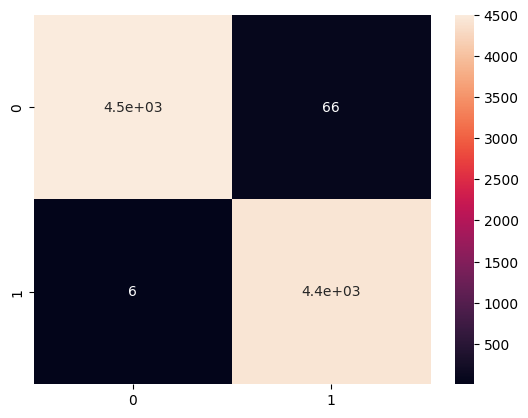

In [20]:
visualize_CM(confusion_matrix(y_test, y_pred))

In [21]:
accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
precision = precision_score(y_true=y_test, y_pred=y_pred, average="weighted")
f1 = f1_score(y_true=y_test, y_pred=y_pred, average="weighted")
recall = recall_score(y_true=y_test, y_pred=y_pred, average="weighted")
mcc = matthews_corrcoef(y_true=y_test,y_pred=y_pred)
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
mse = mean_squared_error(y_true=y_test,y_pred=y_pred)
rmse = root_mean_squared_error(y_true=y_test,y_pred=y_pred)

In [22]:
results = [accuracy, precision, f1, recall, mcc, mae, mse, rmse]
results_dict["kNN"] = results

In [23]:
pd.DataFrame.from_dict(results_dict, orient="index", columns=["Accuracy", "Precision", "F1", "Recall", "MCC", "MAE", "MSE", "RMSE"])

,Accuracy,Precision,F1,Recall,MCC,MAE,MSE,RMSE
kNN,0.992,0.992089,0.992,0.992,0.984087,0.008,0.008,0.089443


# Logistic Regression

In [24]:
%%time

lr_clf = LogisticRegression(max_iter = 10000, C = 0.1, random_state = 0, solver = 'saga', n_jobs=8)
lr_clf.fit(X_train, y_train)
y_pred = lr_clf.predict(X_test)

CPU times: user 1min 24s, sys: 72.8 ms, total: 1min 24s
Wall time: 1min 25s


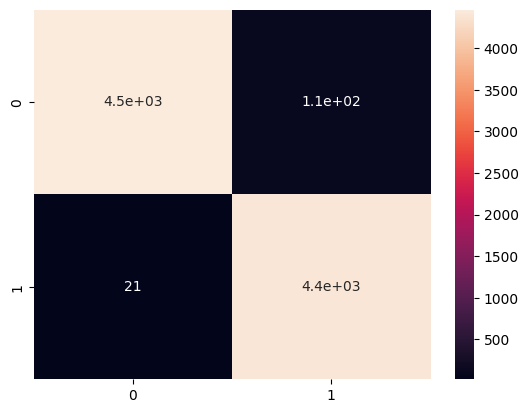

In [25]:
visualize_CM(confusion_matrix(y_test, y_pred))

In [26]:
accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
precision = precision_score(y_true=y_test, y_pred=y_pred, average="weighted")
f1 = f1_score(y_true=y_test, y_pred=y_pred, average="weighted")
recall = recall_score(y_true=y_test, y_pred=y_pred, average="weighted")
mcc = matthews_corrcoef(y_true=y_test,y_pred=y_pred)
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
mse = mean_squared_error(y_true=y_test,y_pred=y_pred)
rmse = root_mean_squared_error(y_true=y_test,y_pred=y_pred)

In [27]:
results = [accuracy, precision, f1, recall, mcc, mae, mse, rmse]
results_dict["LR"] = results

In [28]:
pd.DataFrame.from_dict(results_dict, orient="index", columns=["Accuracy", "Precision", "F1", "Recall", "MCC", "MAE", "MSE", "RMSE"])

,Accuracy,Precision,F1,Recall,MCC,MAE,MSE,RMSE
kNN,0.992000,0.992089,0.992000,0.992000,0.984087,0.008000,0.008000,0.089443
LR,0.985667,0.985853,0.985667,0.985667,0.971517,0.014333,0.014333,0.119722


# Random Forest

In [29]:
%%time

rf_clf = RandomForestClassifier(n_jobs=8)
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)

CPU times: user 16.6 s, sys: 75.2 ms, total: 16.7 s
Wall time: 2.67 s


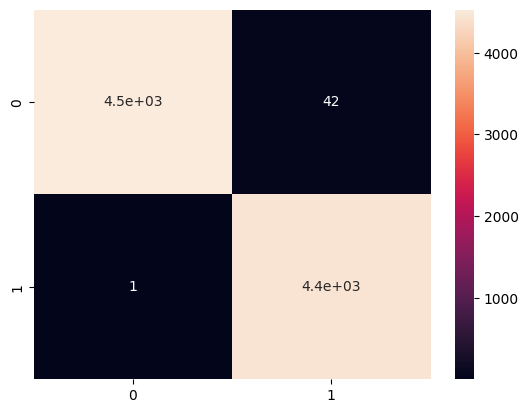

In [30]:
visualize_CM(confusion_matrix(y_test, y_pred))

In [31]:
accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
precision = precision_score(y_true=y_test, y_pred=y_pred, average="weighted")
f1 = f1_score(y_true=y_test, y_pred=y_pred, average="weighted")
recall = recall_score(y_true=y_test, y_pred=y_pred, average="weighted")
mcc = matthews_corrcoef(y_true=y_test,y_pred=y_pred)
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
mse = mean_squared_error(y_true=y_test,y_pred=y_pred)
rmse = root_mean_squared_error(y_true=y_test,y_pred=y_pred)

In [32]:
results = [accuracy, precision, f1, recall, mcc, mae, mse, rmse]
results_dict["RF"] = results

In [33]:
pd.DataFrame.from_dict(results_dict, orient="index", columns=["Accuracy", "Precision", "F1", "Recall", "MCC", "MAE", "MSE", "RMSE"])

,Accuracy,Precision,F1,Recall,MCC,MAE,MSE,RMSE
kNN,0.992000,0.992089,0.992000,0.992000,0.984087,0.008000,0.008000,0.089443
LR,0.985667,0.985853,0.985667,0.985667,0.971517,0.014333,0.014333,0.119722
RF,0.995222,0.995264,0.995222,0.995222,0.990485,0.004778,0.004778,0.069121


# XGBoost

In [34]:
%%time

xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(X_train, y_train)
y_pred = xgb_clf.predict(X_test)

CPU times: user 18.6 s, sys: 113 ms, total: 18.7 s
Wall time: 3.24 s


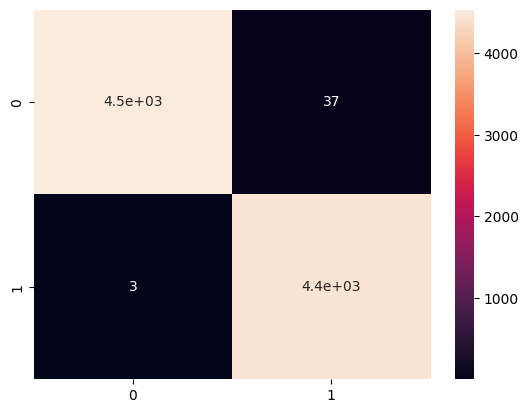

In [35]:
visualize_CM(confusion_matrix(y_test, y_pred))

In [36]:
accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
precision = precision_score(y_true=y_test, y_pred=y_pred, average="weighted")
f1 = f1_score(y_true=y_test, y_pred=y_pred, average="weighted")
recall = recall_score(y_true=y_test, y_pred=y_pred, average="weighted")
mcc = matthews_corrcoef(y_true=y_test,y_pred=y_pred)
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
mse = mean_squared_error(y_true=y_test,y_pred=y_pred) 
rmse = root_mean_squared_error(y_true=y_test,y_pred=y_pred)

In [37]:
results = [accuracy, precision, f1, recall, mcc, mae, mse, rmse]
results_dict["XGBoost"] = results

In [38]:
pd.DataFrame.from_dict(results_dict, orient="index", columns=["Accuracy", "Precision", "F1", "Recall", "MCC", "MAE", "MSE", "RMSE"])

,Accuracy,Precision,F1,Recall,MCC,MAE,MSE,RMSE
kNN,0.992000,0.992089,0.992000,0.992000,0.984087,0.008000,0.008000,0.089443
LR,0.985667,0.985853,0.985667,0.985667,0.971517,0.014333,0.014333,0.119722
RF,0.995222,0.995264,0.995222,0.995222,0.990485,0.004778,0.004778,0.069121
XGBoost,0.995556,0.995584,0.995556,0.995556,0.991138,0.004444,0.004444,0.066667


# LightGBM

In [39]:
%%time

lgbm_clf = lightgbm.LGBMClassifier()
lgbm_clf.fit(X_train, y_train)
y_pred = lgbm_clf.predict(X_test)

[LightGBM] [Info] Number of positive: 25570, number of negative: 25430
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003454 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5085
[LightGBM] [Info] Number of data points in the train set: 51000, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501373 -> initscore=0.005490
[LightGBM] [Info] Start training from score 0.005490
CPU times: user 1.87 s, sys: 24.6 ms, total: 1.9 s
Wall time: 504 ms


/home/kostas/Documents/git/Magistrinis/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


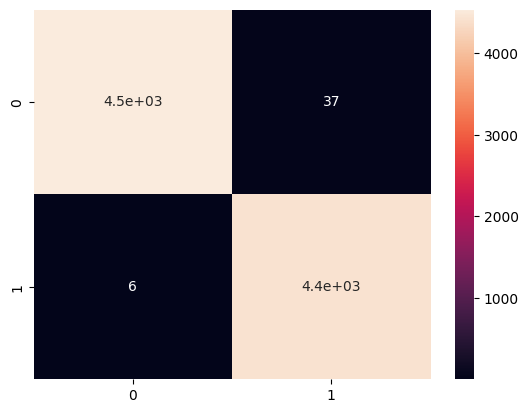

In [40]:
visualize_CM(confusion_matrix(y_test, y_pred))

In [41]:
accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
precision = precision_score(y_true=y_test, y_pred=y_pred, average="weighted")
f1 = f1_score(y_true=y_test, y_pred=y_pred, average="weighted")
recall = recall_score(y_true=y_test, y_pred=y_pred, average="weighted")
mcc = matthews_corrcoef(y_true=y_test,y_pred=y_pred)
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
mse = mean_squared_error(y_true=y_test,y_pred=y_pred) 
rmse = root_mean_squared_error(y_true=y_test,y_pred=y_pred)

In [42]:
results = [accuracy, precision, f1, recall, mcc, mae, mse, rmse]
results_dict["LightGBM"] = results

In [43]:
pd.DataFrame.from_dict(results_dict, orient="index", columns=["Accuracy", "Precision", "F1", "Recall", "MCC", "MAE", "MSE", "RMSE"])

,Accuracy,Precision,F1,Recall,MCC,MAE,MSE,RMSE
kNN,0.992000,0.992089,0.992000,0.992000,0.984087,0.008000,0.008000,0.089443
LR,0.985667,0.985853,0.985667,0.985667,0.971517,0.014333,0.014333,0.119722
RF,0.995222,0.995264,0.995222,0.995222,0.990485,0.004778,0.004778,0.069121
XGBoost,0.995556,0.995584,0.995556,0.995556,0.991138,0.004444,0.004444,0.066667
LightGBM,0.995222,0.995246,0.995222,0.995222,0.990467,0.004778,0.004778,0.069121


# Support Vector Machine

In [44]:
%%time

svm_clf = SVC(kernel = 'poly', C = 1, random_state = 0, probability = True)
svm_clf.fit(X_train, y_train)
y_pred = svm_clf.predict(X_test)

CPU times: user 1min 21s, sys: 345 ms, total: 1min 21s
Wall time: 1min 22s


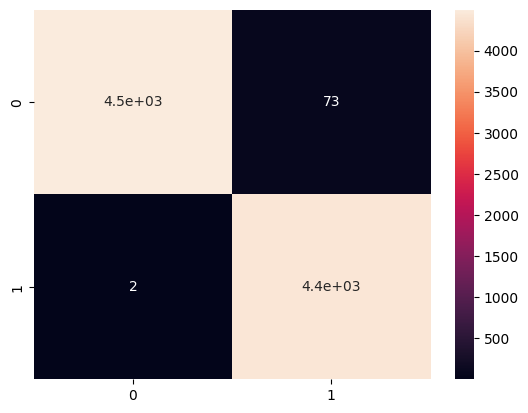

In [45]:
visualize_CM(confusion_matrix(y_test, y_pred))

In [46]:
accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
precision = precision_score(y_true=y_test, y_pred=y_pred, average="weighted")
f1 = f1_score(y_true=y_test, y_pred=y_pred, average="weighted")
recall = recall_score(y_true=y_test, y_pred=y_pred, average="weighted")
mcc = matthews_corrcoef(y_true=y_test,y_pred=y_pred)
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
mse = mean_squared_error(y_true=y_test,y_pred=y_pred) 
rmse = root_mean_squared_error(y_true=y_test,y_pred=y_pred)

In [47]:
results = [accuracy, precision, f1, recall, mcc, mae, mse, rmse]
results_dict["SVM"] = results

In [48]:
pd.DataFrame.from_dict(results_dict, orient="index", columns=["Accuracy", "Precision", "F1", "Recall", "MCC", "MAE", "MSE", "RMSE"])

,Accuracy,Precision,F1,Recall,MCC,MAE,MSE,RMSE
kNN,0.992000,0.992089,0.992000,0.992000,0.984087,0.008000,0.008000,0.089443
LR,0.985667,0.985853,0.985667,0.985667,0.971517,0.014333,0.014333,0.119722
RF,0.995222,0.995264,0.995222,0.995222,0.990485,0.004778,0.004778,0.069121
XGBoost,0.995556,0.995584,0.995556,0.995556,0.991138,0.004444,0.004444,0.066667
LightGBM,0.995222,0.995246,0.995222,0.995222,0.990467,0.004778,0.004778,0.069121
SVM,0.991667,0.991791,0.991667,0.991667,0.983456,0.008333,0.008333,0.091287


# Feed Forward Neural Network

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.18)
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((41820, 46), (41820,), (9180, 46), (9180,), (9000, 46), (9000,))

In [50]:
def create_model(X_train, y_train):
    model = keras.Sequential()
    model.add(keras.layers.Dense(X_train.shape[1], activation='relu', input_shape=(X_train.shape[1],)))
    model.add(keras.layers.Dense(256, activation='relu'))
    model.add(keras.layers.Dense(256, activation='relu'))
    model.add(keras.layers.Dense(len(np.unique(y_train)), activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model
model = create_model(X_train, y_train)

/home/kostas/Documents/git/Magistrinis/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
W0000 00:00:1743874365.674362  340631 gpu_device.cc:2341] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [51]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 46)             │         2,162 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        12,032 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 80,500 (314.45 KB)

 Trainable params: 80,500 (314.45 KB)

 Non-trainable params: 0 (0.00 B)

In [52]:
%%time
model.fit(X_train, y_train,
          batch_size=16,
          epochs=20,
          validation_data=(X_val, y_val))
gc.collect();

Epoch 1/20
2614/2614 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9833 - loss: 0.0727 - val_accuracy: 0.9922 - val_loss: 0.0375
Epoch 2/20
2614/2614 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9911 - loss: 0.0381 - val_accuracy: 0.9927 - val_loss: 0.0318
Epoch 3/20
2614/2614 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9920 - loss: 0.0347 - val_accuracy: 0.9924 - val_loss: 0.0316
Epoch 4/20
2614/2614 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9925 - loss: 0.0324 - val_accuracy: 0.9922 - val_loss: 0.0334
Epoch 5/20
2614/2614 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9927 - loss: 0.0324 - val_accuracy: 0.9927 - val_loss: 0.0280
Epoch 6/20
2614/2614 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9928 - loss: 0.0304 - val_accuracy: 0.9930 - val_loss: 0.0339
Epoch 7/20
2614/2614 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9933 - loss: 0.0287 - val_accuracy: 0.9930 - val_loss: 0.0283
Epoch 8/20
2614/2614 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9933 - loss: 0.0281 - 

In [53]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


In [54]:
_, accuracy = model.evaluate(X_test, y_test)
precision = precision_score(y_true=y_test, y_pred=y_pred, average="weighted")
f1 = f1_score(y_true=y_test, y_pred=y_pred, average="weighted")
recall = recall_score(y_true=y_test, y_pred=y_pred, average="weighted")
mcc = matthews_corrcoef(y_true=y_test,y_pred=y_pred)
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
mse = mean_squared_error(y_true=y_test,y_pred=y_pred) 
rmse = root_mean_squared_error(y_true=y_test,y_pred=y_pred)

282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9923 - loss: 0.0387 


In [55]:
results = [accuracy, precision, f1, recall, mcc, mae, mse, rmse]
results_dict["FF-NN"] = results

In [56]:
pd.DataFrame.from_dict(results_dict, orient="index", columns=["Accuracy", "Precision", "F1", "Recall", "MCC", "MAE", "MSE", "RMSE"])

,Accuracy,Precision,F1,Recall,MCC,MAE,MSE,RMSE
kNN,0.992000,0.992089,0.992000,0.992000,0.984087,0.008000,0.008000,0.089443
LR,0.985667,0.985853,0.985667,0.985667,0.971517,0.014333,0.014333,0.119722
RF,0.995222,0.995264,0.995222,0.995222,0.990485,0.004778,0.004778,0.069121
XGBoost,0.995556,0.995584,0.995556,0.995556,0.991138,0.004444,0.004444,0.066667
LightGBM,0.995222,0.995246,0.995222,0.995222,0.990467,0.004778,0.004778,0.069121
SVM,0.991667,0.991791,0.991667,0.991667,0.983456,0.008333,0.008333,0.091287
FF-NN,0.992778,0.992796,0.992778,0.992778,0.985573,0.007222,0.007222,0.084984


# LSTM

In [57]:
# Prepare sequential data
def create_sequences(features, labels, seq_length):
    sequences, seq_labels = [], []
    for i in range(len(features) - seq_length):
        sequences.append(features[i:i + seq_length])
        seq_labels.append(labels[i + seq_length - 1])  # Use the last label in the sequence
    return np.array(sequences), np.array(seq_labels)

In [58]:
num_components = len(np.unique(y))

In [59]:
# Create sequences
seq_length = 20
X1, y1 = create_sequences(X, y, seq_length)
y1 = to_categorical(y1, num_classes=num_components)  # Convert labels to one-hot encoding

In [60]:
# Split data
X_train, X_temp, y_train, y_temp = train_test_split(X1, y1, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [61]:
def create_model_LSTM(input_shape, num_classes):
    model = keras.Sequential([
        keras.layers.LSTM(64, input_shape=input_shape, return_sequences=True),
        keras.layers.Dropout(0.3),
        keras.layers.LSTM(32),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(num_classes, activation='sigmoid')  # Use softmax for multi-class classification
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [62]:
# Build model
model = create_model_LSTM(input_shape=(seq_length, X1.shape[2]), num_classes=num_components)

/home/kostas/Documents/git/Magistrinis/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [63]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 20, 64)         │        28,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 20, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 43,074 (168.26 KB)

 Trainable params: 43,074 (168.26 KB)

 Non-trainable params: 0 (0.00 B)

In [64]:
%%time

history = model.fit(
    X_train, y_train,
    epochs=3,
    batch_size=32,
    validation_data=(X_val, y_val)
)

Epoch 1/3
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.9926 - loss: 0.0361 - val_accuracy: 0.9999 - val_loss: 6.4088e-04
Epoch 2/3
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 1.0000 - loss: 1.3336e-04 - val_accuracy: 0.9999 - val_loss: 1.1745e-04
Epoch 3/3
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.9999 - loss: 3.7669e-04 - val_accuracy: 1.0000 - val_loss: 4.2791e-06
CPU times: user 2min 2s, sys: 8.81 s, total: 2min 11s
Wall time: 47.7 s


In [65]:
# Evaluate model
y_pred = model.predict(X_test)

282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step   


In [66]:
_, accuracy = model.evaluate(X_test, y_test)

282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 2.5684e-07


In [67]:
y_test = np.argmax(y_test, axis=1)
y_pred = np.argmax(y_pred, axis=1)

In [68]:
precision = precision_score(y_true=y_test, y_pred=y_pred, average="weighted")
f1 = f1_score(y_true=y_test, y_pred=y_pred, average="weighted")
recall = recall_score(y_true=y_test, y_pred=y_pred, average="weighted")
mcc = matthews_corrcoef(y_true=y_test,y_pred=y_pred)
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
mse = mean_squared_error(y_true=y_test,y_pred=y_pred) 
rmse = root_mean_squared_error(y_true=y_test,y_pred=y_pred)

In [69]:
results = [accuracy, precision, f1, recall, mcc, mae, mse, rmse]
results_dict["LSTM"] = results

In [70]:
pd.DataFrame.from_dict(results_dict, orient="index", columns=["Accuracy", "Precision", "F1", "Recall", "MCC", "MAE", "MSE", "RMSE"])

,Accuracy,Precision,F1,Recall,MCC,MAE,MSE,RMSE
kNN,0.992000,0.992089,0.992000,0.992000,0.984087,0.008000,0.008000,0.089443
LR,0.985667,0.985853,0.985667,0.985667,0.971517,0.014333,0.014333,0.119722
RF,0.995222,0.995264,0.995222,0.995222,0.990485,0.004778,0.004778,0.069121
XGBoost,0.995556,0.995584,0.995556,0.995556,0.991138,0.004444,0.004444,0.066667
LightGBM,0.995222,0.995246,0.995222,0.995222,0.990467,0.004778,0.004778,0.069121
SVM,0.991667,0.991791,0.991667,0.991667,0.983456,0.008333,0.008333,0.091287
FF-NN,0.992778,0.992796,0.992778,0.992778,0.985573,0.007222,0.007222,0.084984
LSTM,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000


# Plot data

In [71]:
results_df = pd.DataFrame.from_dict(results_dict, orient="index", columns=["Accuracy", "Precision", "F1", "Recall", "MCC", "MAE", "MSE", "RMSE"])

In [72]:
def result_plot(_dict, name):
    attacks = {}
    higher = ["F1", "Accuracy", "Precision", "Recall", "MCC"]
    fig, ax = plt.subplots(figsize=(10,10))
    if name in higher:
        tmp = sorted(_dict.items(), key = lambda x:x[1])
    else:
        tmp = sorted(_dict.items(), key = lambda x:x[1], reverse=True)
    for x in tmp:
        attacks[x[0]] = x[1]
    ax.bar(attacks.keys(), attacks.values())
    rects = ax.patches
    results = [i for i in attacks.values()]
    labels = [f"{results[i]:.6f}" for i in range(len(rects))]
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width() / 2, height, label, ha="center", va="bottom"
        )
    if name in higher:
        ax.set_title(f'{name} (higher is better)', fontsize=16, fontweight="bold")
    else:
        ax.set_title(f'{name} (lower is better)', fontsize=16, fontweight="bold")
    ax.set_xlabel(f'{name}')
    ax.set_ylabel('Score')
    ax.grid(which='Major', axis='both')
    ax.set_axisbelow(True)
    plt.savefig(f"images/results/binary/{name}.png")

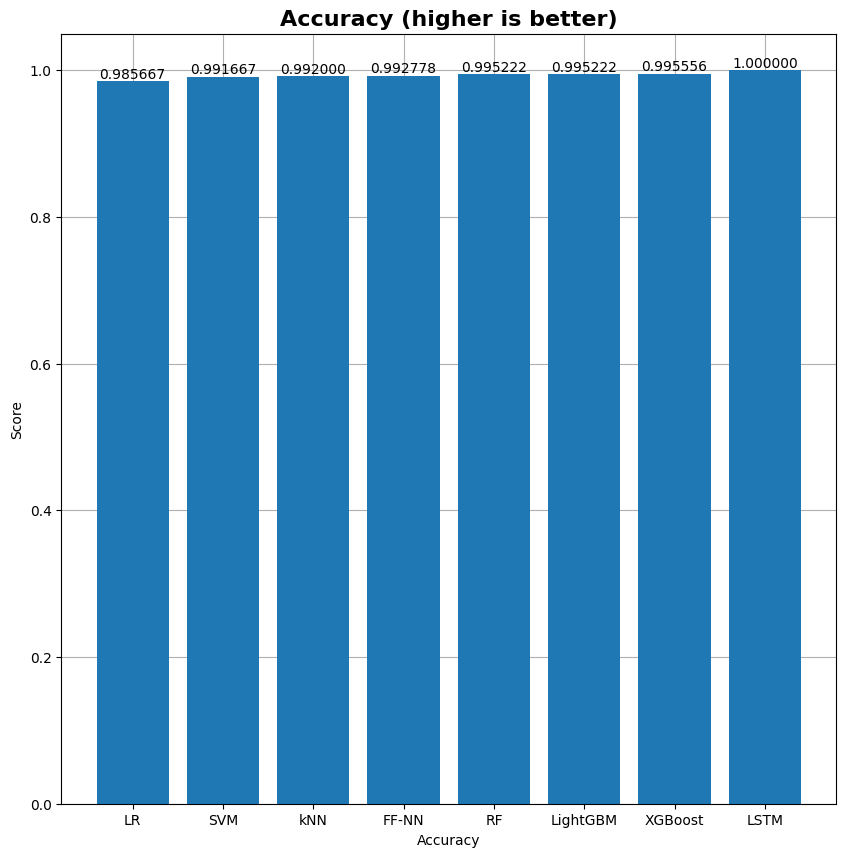

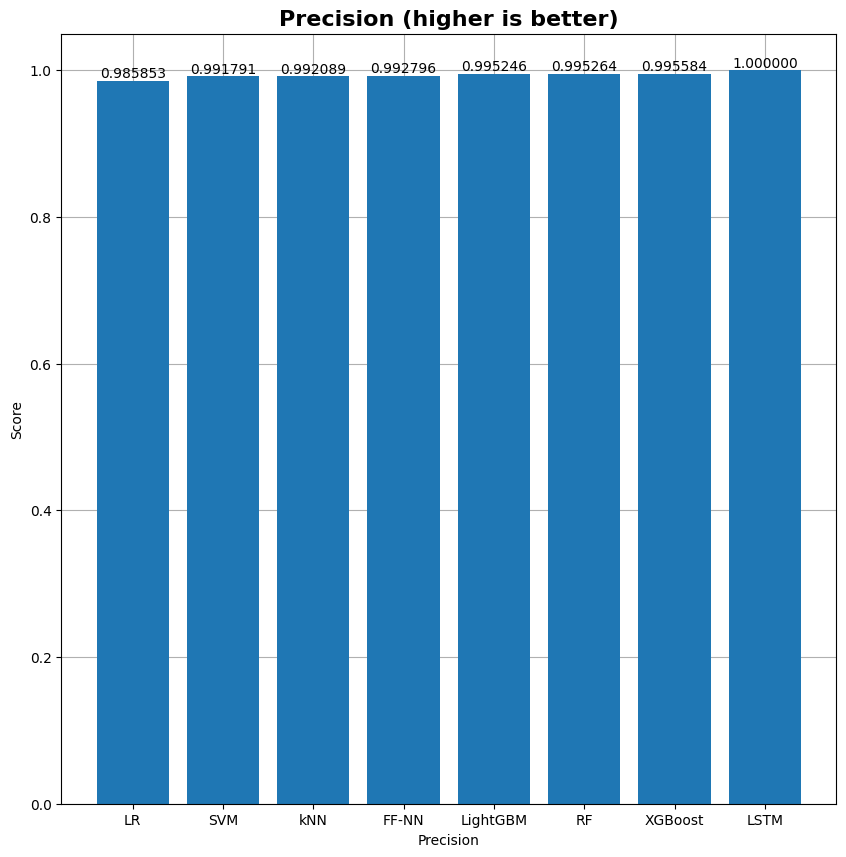

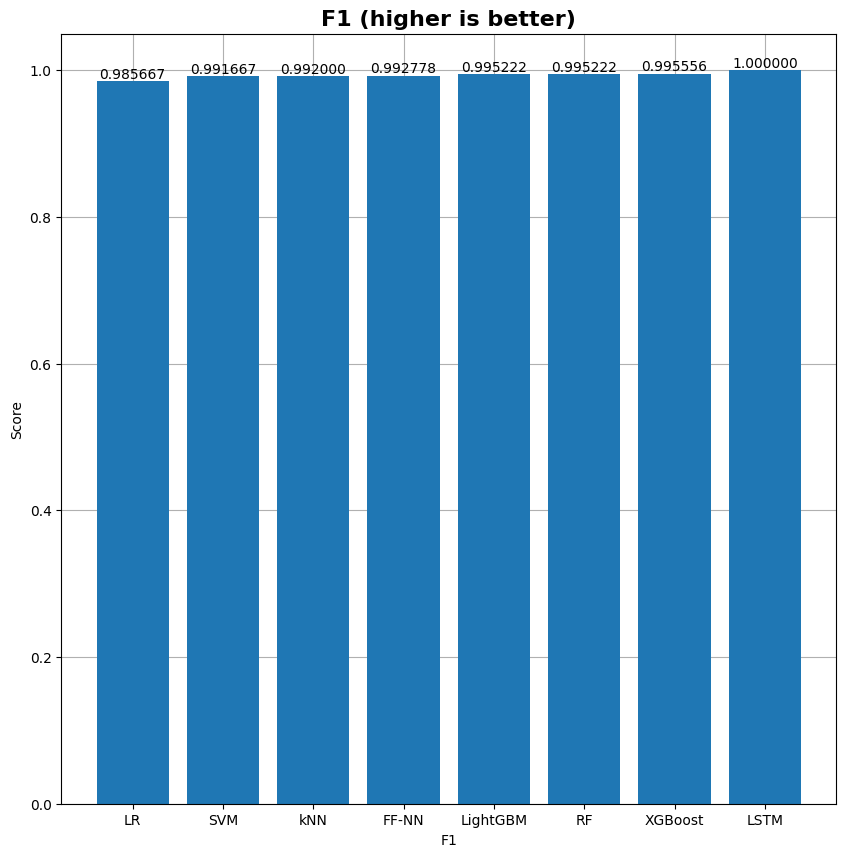

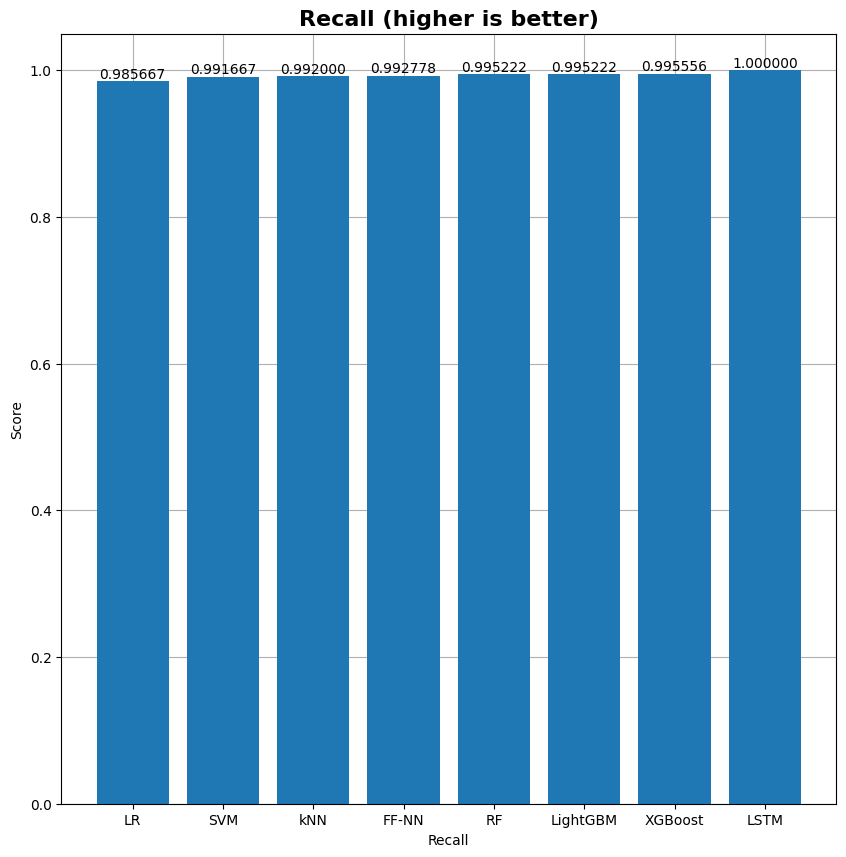

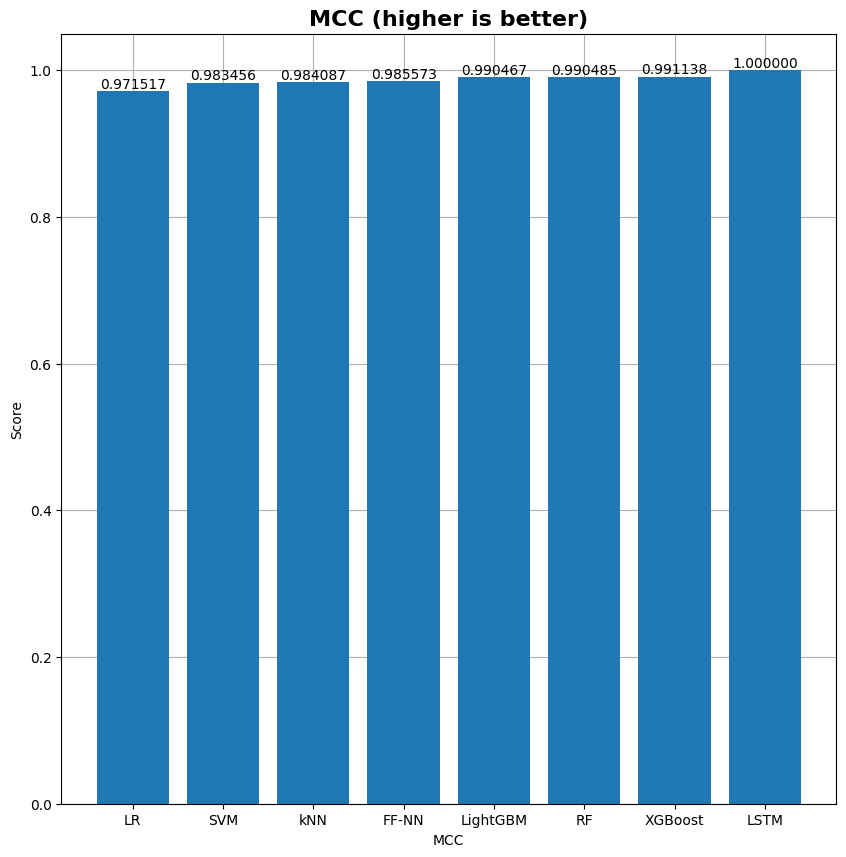

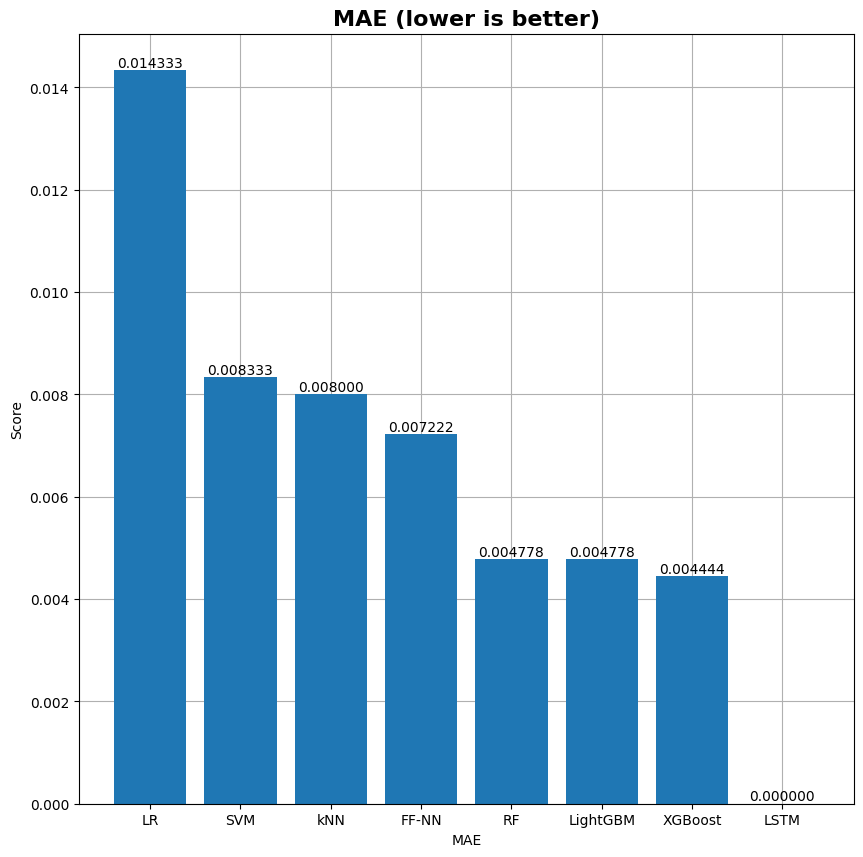

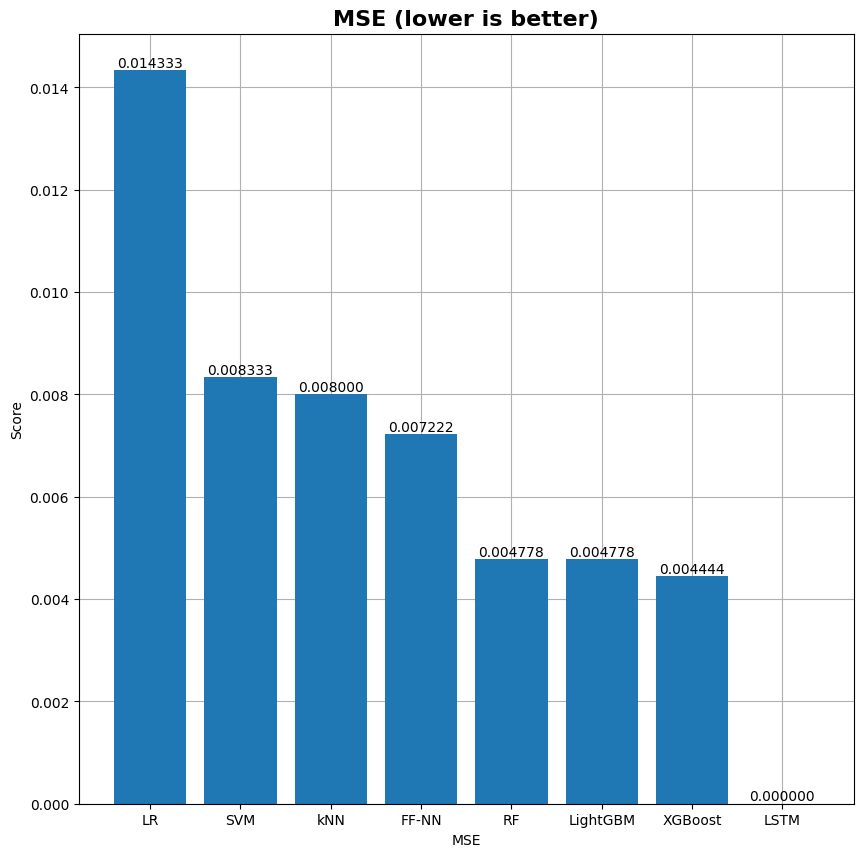

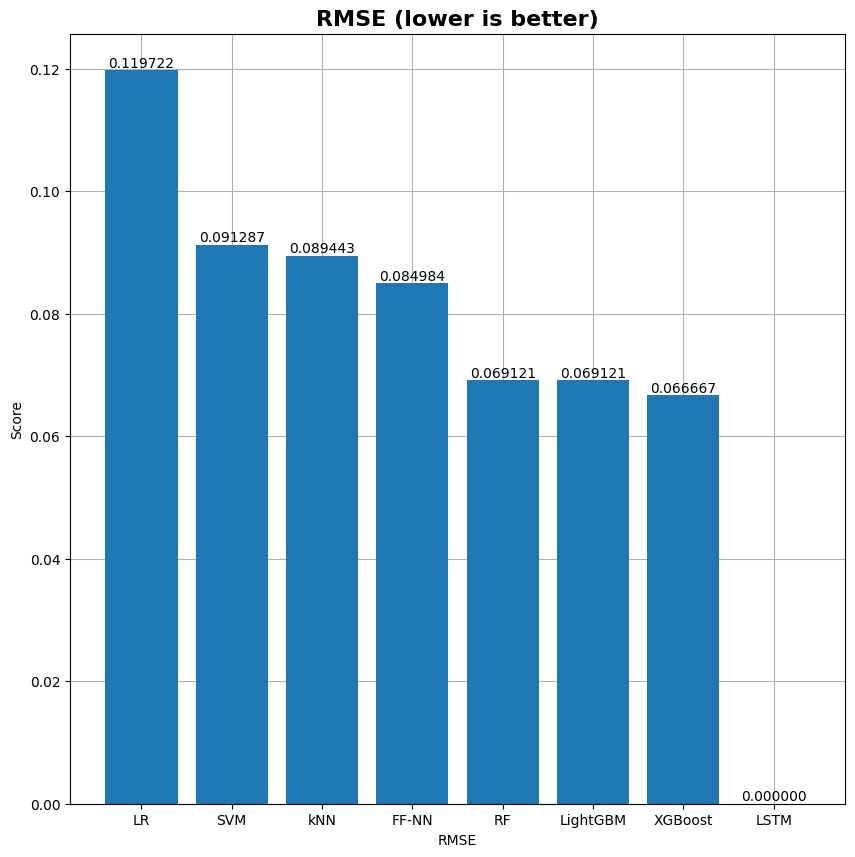

In [73]:
for x in results_df:
    _dict = {}
    name = results_df[x].name
    for keys, values in zip(range(len(results_df[x].keys())), results_df[x]):
        _dict[results_df[x].keys()[keys]] = values
    result_plot(_dict, name)